##0. Proof of Concepts (IGNORE)

Here are the tests that I used throughout to solve some of the fundamental problems of the project. I figured I would leave them here for anyone interested in seeing the thought process.

In [ ]:
""" Multiprocessing and Pipelines """
# Simulates 2 processes needing different amounts of time to complete via 
# multiprocessing and queues


def f(q, num):
  x_sq = num * num
  time.sleep(0.001)
  q.put_nowait(x_sq)


list_of_numbers = list(range(0, 100))
print(list_of_numbers)
x_sq = 0
parent_conn, child_conn = Pipe()
q = Queue()
p = None
total_time_start = time.perf_counter()
for x in list_of_numbers:
  loop_start = time.perf_counter()
  if not q.qsize():
    if p is None:
      p = Process(target=f, args=(q,x))
      p.start()
  print("X: {}, X2: {}".format(x, x_sq))
  #print(q.qsize())
  
  if not q.empty():
    x_sq = q.get_nowait()
    p.join()
    p = None
  
  loop_end = time.perf_counter()
  print("Iter Time: {}".format(loop_end - loop_start))
total_time_end = time.perf_counter()
print("Full Time: {}".format(total_time_end - total_time_start))
#p.join()


In [ ]:
""" Video Feed """
# Functionality for reading a video feed and playing it back
cap = cv2.VideoCapture("gdrive/MyDrive/Colab Notebooks/Video_Samples/unrelated_sample.mp4")

if (cap.isOpened() == False):
  print("Error Opening Video File")

while(cap.isOpened()):
  ret, frame = cap.read()
  if ret == True:
    cv2_imshow('Frame', frame)
  
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
  
  else:
    break

cap.release()
cv2.destroyAllWindows()


TypeError: ignored

##1. Imports

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import cv2
import json
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import random
import time
from multiprocessing import Process, Pipe, Queue
from PIL import Image
from google.colab.patches import cv2_imshow

In [ ]:
%matplotlib inline   

In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, 3, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=2),
            nn.ReLU(),
            nn.Conv2d(128, 256, 3, stride = 2),
            nn.ReLU(),
            nn.Conv2d(256, 512, 3, stride = 2),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512, 256, 3, stride=2),
            nn.ReLU(),
            #nn.ConvTranspose2d(256, 256, 1, stride=1),
            #nn.ReLU(),
            nn.ConvTranspose2d(256, 256, 3, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, 1, stride=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 128, 3, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 1, stride=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 64, 3, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 1, 2, stride=1)
        )

    def forward(self, x):
        x = self.encoder(x)
        #print("Encoding Output Shape: {}".format(x.shape))
        x = self.decoder(x)
        #print("Final Output Shape: {}".format(x.shape))
        return x

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
autoencoder = AutoEncoder()
autoencoder.load_state_dict(torch.load('gdrive/MyDrive/Colab Notebooks/model_weights_100samples.pth'))

%pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

yolo_model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

     |████████████████████████████████| 596 kB 15.5 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 2022-1-10 torch 1.10.0+cu111 CPU




requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



  0%|          | 0.00/14.0M [00:00<?, ?B/s]

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
#Testing preliminary model readings
pil_image = Image.open("gdrive/MyDrive/Colab Notebooks/Full_Court_Photo_Set/court_dp_0.jpg")
np_image = np.asarray(pil_image)

output = yolo_model(pil_image)
pd_output = output.pandas()
boxes = pd_output.xywh[0]

#plot = plt.imshow(np_image)



/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [ ]:
boxes_people = boxes[boxes["name"] == "person"]
boxes_people["xcenter"] = boxes_people["xcenter"].astype(int)
boxes_people["ycenter"] = boxes_people["ycenter"].astype(int)
boxes_people["width"] = boxes_people["width"].astype(int)
boxes_people["height"] = boxes_people["height"].astype(int)

boxes_people

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,xcenter,ycenter,width,height,confidence,class,name
0,113,610,107,400,0.877114,0,person
1,1245,554,193,639,0.854448,0,person
2,807,513,74,238,0.843630,0,person
3,1006,510,73,242,0.836583,0,person
4,1788,564,118,345,0.830008,0,person
5,580,603,159,461,0.821939,0,person
6,666,588,122,359,0.792123,0,person
7,1485,560,104,372,0.791403,0,person
8,34,524,65,245,0.742020,0,person
9,1554,588,123,376,0.720459,0,person


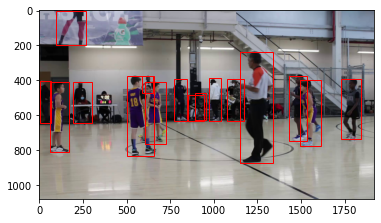

In [ ]:
img = pd_output.imgs[0]

rect_array = []
# Create a Rectangle patch
for index, row in boxes_people.iterrows():
  height = row["height"]
  width = row["width"]
  rect = patches.Rectangle((row["xcenter"] - int(width / 2), row["ycenter"] - int(height / 2)), width, height, linewidth=1, edgecolor='r', facecolor='none')
  rect_array.append(rect)
# Create figure and axes
fig, ax = plt.subplots()
for i_rect in rect_array:
  ax.add_patch(i_rect)

plt.imshow(img)


In [ ]:
def convert_img_to_mask(img, model):
  input = cv2.resize(img, (720, 480), interpolation = cv2.INTER_AREA)
  input = np.swapaxes(input, 0, 1)
  input = np.swapaxes(input, 0, 2)
  input = torch.from_numpy(input).float()
  input = input.unsqueeze(0)

  output = model(input)
  sig_out = F.sigmoid(output)
  sig_output = (sig_out > 0.5).float()
  output_img = np.array(sig_output)
  output_img = np.array(output_img[0])
  output_img = output_img.squeeze(0)
  output_img = cv2.resize(output_img, (1920, 1080))
  #plt.imshow(output_img, cmap="gray")
  return output_img

def get_people(boxes):
  boxes_people = boxes[boxes["name"] == "person"]
  boxes_people["xcenter"] = boxes_people["xcenter"].astype(int)
  boxes_people["ycenter"] = boxes_people["ycenter"].astype(int)
  boxes_people["width"] = boxes_people["width"].astype(int)
  boxes_people["height"] = boxes_people["height"].astype(int)
  return boxes_people


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


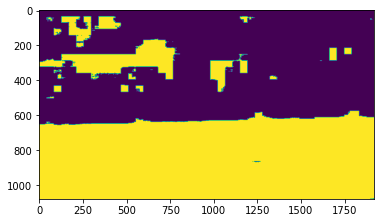

In [ ]:
mask = convert_img_to_mask(img, autoencoder)
plt.imshow(mask)

##2. Function Setup

In [ ]:
def get_center_of_play(img, court_detector, player_detector, relative=False):
  overlap_perc = 0.05
  match_ratio = 0.9

  output = yolo_model(img)
  pd_output = output.pandas()
  boxes = get_people(pd_output.xywh[0])
  extracted_img = pd_output.imgs[0]

  mask = convert_img_to_mask(extracted_img, court_detector)
  #print(mask.shape[1])
  top_half = mask[:int(mask.shape[0] / 2)]
  #plt.imshow(top_half)

  index_list = []
  for index, row in boxes.iterrows():
    height = row["height"]
    width = row["width"]
    left_ind = row["xcenter"] - int(width/2) 
    right_ind = row["xcenter"] + int(width/2)
    top_ind = row["ycenter"] + int(height/2) - int(height * overlap_perc)
    bot_ind = row["ycenter"] + int(height/2)
    #print("{}. Top: {} | Bot: {} | Left: {} | Right: {}".format(index, top_ind, bot_ind, left_ind, right_ind))
    segment = mask[top_ind:bot_ind]
    seg_size = segment.size
    sumation = segment.sum()
    if float(sumation/seg_size) > match_ratio:
      index_list.append(index)
  
  updated_boxes = boxes.loc[index_list]
  print(updated_boxes)

  rect_array = []
  # Create a Rectangle patch
  for index, row in updated_boxes.iterrows():
    height = row["height"]
    width = row["width"]
    rect = patches.Rectangle((row["xcenter"] - int(width / 2), row["ycenter"] - int(height / 2)), width, height, linewidth=1, edgecolor='r', facecolor='none')
    rect_array.append(rect)
  # Create figure and axes
  fig, ax = plt.subplots()
  for i_rect in rect_array:
    ax.add_patch(i_rect)
  plt.imshow(img)
    



##3. Execution

In [ ]:
new_img = Image.open("gdrive/MyDrive/Colab Notebooks/Full_Court_Photo_Set/court_dp_922.jpg")
get_center_of_play(new_img, autoencoder, yolo_model)